<a href="https://colab.research.google.com/github/syedanida/deep-learning-multimodal-colabs/blob/main/8_Deep_Floyd_IF_Capabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Floyd IF Demonstration

In [8]:
!pip install -q diffusers transformers accelerate
!pip install -q torch torchvision matplotlib

In [9]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from PIL import Image
import time

In [10]:
# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [11]:
# Choose a lightweight model
model_id = "CompVis/stable-diffusion-v1-4"  # Smaller than v1-5

Keyword arguments {'scheduler_type': 'DDIM'} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Model loaded successfully!

Generating images with optimized settings...
Generating: 'A majestic lion wearing a crown, digital art'


  0%|          | 0/15 [00:00<?, ?it/s]

Generating: 'A robot in impressionist style'


  0%|          | 0/15 [00:00<?, ?it/s]

Generating: 'A sign that says HELLO WORLD in bold letters'


  0%|          | 0/15 [00:00<?, ?it/s]

Generating: 'A futuristic city at sunset'


  0%|          | 0/15 [00:00<?, ?it/s]


Total generation time: 1715.5 seconds


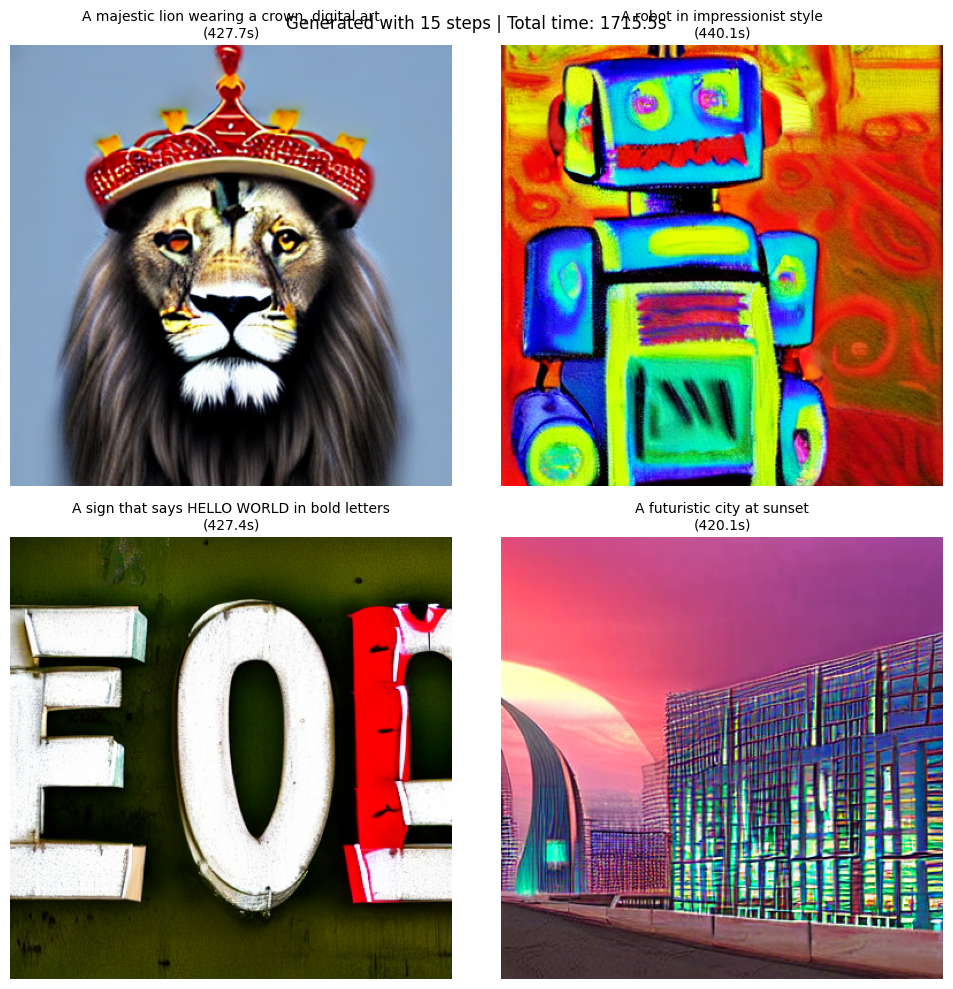


--- Demonstration Summary ---
Generated 4 images in 1715.5 seconds
Average time per image: 428.9 seconds
Using 15 inference steps per image


In [13]:
# Optimization function to make a single demonstration run faster
def run_optimized_demo():
    # Load pipeline with optimizations
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16 if device == "cuda" else torch.float32,
        safety_checker=None,
        # Use a smaller scheduler
        scheduler_type="DDIM"  # Faster than default
    )

    # Enable optimizations
    pipe.enable_attention_slicing()
    if device == "cuda":
        # Minimize memory usage
        pipe.enable_sequential_cpu_offload()

    pipe = pipe.to(device)
    print("Model loaded successfully!")

    # Just generate 4 images to demonstrate key concepts
    # Use fewer steps for faster generation
    num_inference_steps = 15  # Reduced from 30
    print("\nGenerating images with optimized settings...")

    # Define prompts (use just 4 diverse examples)
    prompts = [
        "A majestic lion wearing a crown, digital art",
        "A robot in impressionist style",
        "A sign that says HELLO WORLD in bold letters",
        "A futuristic city at sunset"
    ]

    # Track generation time
    total_start_time = time.time()

    # Create a 2x2 grid for images
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for i, prompt in enumerate(prompts):
        print(f"Generating: '{prompt}'")
        start_time = time.time()

        # Generate image (with reduced steps and size)
        with torch.no_grad():
            generator = torch.manual_seed(i * 100)
            image = pipe(
                prompt=prompt,
                num_inference_steps=num_inference_steps,
                guidance_scale=7.5,
                height=384,  # Smaller size for speed
                width=384,   # Smaller size for speed
                generator=generator
            ).images[0]

        # Display image
        axes[i].imshow(image)
        axes[i].set_title(f"{prompt}\n({time.time() - start_time:.1f}s)", fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    total_time = time.time() - total_start_time
    print(f"\nTotal generation time: {total_time:.1f} seconds")
    plt.suptitle(f"Generated with {num_inference_steps} steps | Total time: {total_time:.1f}s", fontsize=12)
    plt.show()

    # Return stats for reporting
    return {
        "total_time": total_time,
        "num_images": len(prompts),
        "steps": num_inference_steps
    }

# Run the optimized demo
try:
    stats = run_optimized_demo()

    print("\n--- Demonstration Summary ---")
    print(f"Generated {stats['num_images']} images in {stats['total_time']:.1f} seconds")
    print(f"Average time per image: {stats['total_time']/stats['num_images']:.1f} seconds")
    print(f"Using {stats['steps']} inference steps per image")

except Exception as e:
    print(f"Error: {e}")